# Makine Öğrenmesi - Doğrusal Regresyon Modelleri

## Basit Doğrusal Regresyon 

### Model

In [1]:
#http://faculty.marshall.usc.edu/gareth-james/ISL/data.html
import pandas as pd
df = pd.read_csv("Advertising.csv")
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


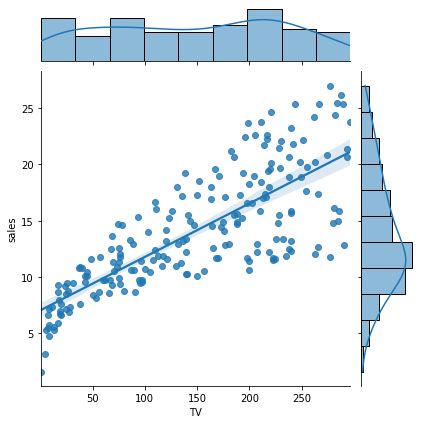

In [3]:
import seaborn as sns
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg");

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
X = df[["TV"]]

In [6]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [7]:
y = df[["sales"]]

In [8]:
reg = LinearRegression()

In [9]:
model = reg.fit(X, y)

In [10]:
model

LinearRegression()

In [11]:
str(model)

'LinearRegression()'

In [12]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [13]:
model.intercept_

array([7.03259355])

In [14]:
model.coef_

array([[0.04753664]])

In [15]:
#rkare
model.score(X,y)

0.611875050850071

### Tahmin

D:\Programs\Anaconda\envs\deeplearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


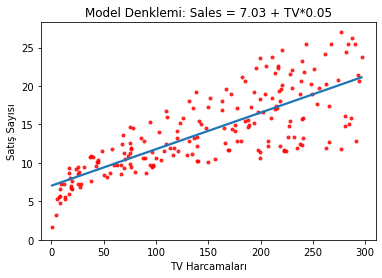

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0);

Sales = 7.03 + 0.05*TV

In [17]:
model.intercept_ + model.coef_*165

array([[14.87613922]])

In [18]:
model.predict([[165]])

array([[14.87613922]])

In [19]:
yeni_veri = [[5],[15],[30]]

In [20]:
model.predict(yeni_veri)

array([[7.27027675],
       [7.74564316],
       [8.45869276]])

## Artıklar ve Makine Öğrenmesindeki Önemi

**MSE: Hata Kareler Ortalaması**

**RMSE: Hata Kareler Ortalamasının Karekökü**

In [21]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [22]:
model.predict(X)[:5]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814]])

In [23]:
gercek_y = y[0:10]

In [24]:
tahmin_edilen_y = pd.DataFrame(model.predict(X)[0:10])

In [25]:
hatalar=pd.concat([gercek_y,tahmin_edilen_y],axis=1)

In [27]:
hatalar.columns = ['gercek_y','tahmin_edilen_y']

In [28]:
hatalar

,gercek_y,tahmin_edilen_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [29]:
hatalar["hata"] = hatalar["gercek_y"] - hatalar["tahmin_edilen_y"]

In [30]:
hatalar

,gercek_y,tahmin_edilen_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [31]:
hatalar["hata_kareler"] = hatalar["hata"]**2

In [32]:
hatalar

,gercek_y,tahmin_edilen_y,hata,hata_kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [34]:
import numpy as np
np.mean(hatalar["hata_kareler"])

9.290350329638104

## Çoklu Doğrusal Regresyon

### Model

In [36]:
#http://faculty.marshall.usc.edu/gareth-james/ISL/data.html
import pandas as pd
df = pd.read_csv("Advertising.csv")
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [37]:
X = df.drop('sales', axis=1)
y = df[["sales"]]

In [38]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [39]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [45]:
##scikit learn ile model kurmak

In [47]:
from sklearn.linear_model import LinearRegression
lm  = LinearRegression()

In [48]:
model = lm.fit(X, y)

In [49]:
model.intercept_

array([2.93888937])

In [50]:
model.coef_

array([[ 0.04576465,  0.18853002, -0.00103749]])

## Tahmin

**Sales = 2.94 + TV * 0.04 + radio * 0.19 - newspaper * 0.001**

30 birim TV, 10 birim radio, 40 birim gazete 

In [51]:
2.94 + 30 * 0.04 + 10 * 0.19 - 40 * 0.001

5.999999999999999

In [67]:
yeni_veri = [[300],[120],[400]]

In [68]:
import pandas as pd
yeni_veri = pd.DataFrame(yeni_veri).T

In [72]:
yeni_veri

,0,1,2
0,300,120,400


In [73]:
model.predict(yeni_veri)

array([[38.87688782]])

In [74]:
from sklearn.metrics import mean_squared_error

In [75]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [76]:
model.predict(X)[0:10]

array([[20.52397441],
       [12.33785482],
       [12.30767078],
       [17.59782951],
       [13.18867186],
       [12.47834763],
       [11.72975995],
       [12.12295317],
       [ 3.72734086],
       [12.55084872]])

In [77]:
MSE = mean_squared_error(y, model.predict(X))
MSE

2.784126314510936

In [78]:
import numpy as np
RMSE = np.sqrt(MSE)
RMSE

1.6685701407225697

### Model Tuning (Model Doğrulama)

In [79]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [80]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [81]:
#sinama seti
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [83]:
X_train.head()

,TV,radio,newspaper
108,13.1,0.4,25.6
107,90.4,0.3,23.2
189,18.7,12.1,23.4
14,204.1,32.9,46.0
56,7.3,28.1,41.4


In [84]:
y_train.head()

,sales
108,5.3
107,8.7
189,6.7
14,19.0
56,5.5


In [85]:
X_test.head()

,TV,radio,newspaper
58,210.8,49.6,37.7
40,202.5,22.3,31.6
34,95.7,1.4,7.4
102,280.2,10.1,21.4
184,253.8,21.3,30.0


In [86]:
y_test.head()

,sales
58,23.8
40,16.6
34,9.5
102,14.8
184,17.6


In [87]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [90]:
#egitim hatasi
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

1.736902590147092

In [91]:
#test hatasi
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

1.4113417558581585

In [ ]:
#k-katlı cv

In [92]:
from sklearn.model_selection import cross_val_score

In [93]:
cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")

array([-1.62375953, -3.81875608, -3.43828142, -2.27748673, -7.25325414,
       -1.88303708, -2.80517715, -3.68594486, -1.12810834, -3.96330989])

In [94]:
#cv mse
np.mean(-cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error"))

3.187711520944358

In [95]:
#cv rmse
np.sqrt(np.mean(-cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))

1.7854163438661466

In [97]:
#cv rmse
np.sqrt(np.mean(-cross_val_score(model, X_test, y_test, cv = 10, scoring = "neg_mean_squared_error")))

1.3077146430862319

# Ridge Regresyon

### Gerekli Kütüphaneler

In [4]:
#L2 klasik regression + lambda ceza parametresi
#overfite karşı dirençli
#çoklu doğrusal bağlantıda etkilidir. 2 tane korelasyon varsa 
#Tüm değişkenlerle model kurar, katsayıyı 0a yaklaştırır.
# lamba için cv yöntemi kullanılır
#lambdanın 0 olduğu yer klasik regresyon olur.


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

### Veri Seti

In [23]:
df = pd.read_csv("Hitters.csv")

df = df.dropna()

dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df["Salary"]

X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [24]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [25]:
df.shape

(263, 20)

In [27]:
ridge_model = Ridge(alpha = 5).fit(X_train, y_train)

In [28]:
ridge_model

Ridge(alpha=5)

In [29]:
ridge_model.coef_

array([ -1.81040449,   8.87872786,   7.12487047,  -3.31713488,
        -2.01162162,   5.40691525,   7.25828404,  -0.13033385,
        -0.25425913,  -0.71109275,   1.81452   ,   0.77083457,
        -0.6768975 ,   0.26211894,   0.2646614 ,  -0.36947934,
        76.19519054, -90.15523668, -16.00453535])

In [30]:
ridge_model.intercept_

-3.4251968687151475

In [31]:
np.linspace(10,-2,100)

array([10.        ,  9.87878788,  9.75757576,  9.63636364,  9.51515152,
        9.39393939,  9.27272727,  9.15151515,  9.03030303,  8.90909091,
        8.78787879,  8.66666667,  8.54545455,  8.42424242,  8.3030303 ,
        8.18181818,  8.06060606,  7.93939394,  7.81818182,  7.6969697 ,
        7.57575758,  7.45454545,  7.33333333,  7.21212121,  7.09090909,
        6.96969697,  6.84848485,  6.72727273,  6.60606061,  6.48484848,
        6.36363636,  6.24242424,  6.12121212,  6.        ,  5.87878788,
        5.75757576,  5.63636364,  5.51515152,  5.39393939,  5.27272727,
        5.15151515,  5.03030303,  4.90909091,  4.78787879,  4.66666667,
        4.54545455,  4.42424242,  4.3030303 ,  4.18181818,  4.06060606,
        3.93939394,  3.81818182,  3.6969697 ,  3.57575758,  3.45454545,
        3.33333333,  3.21212121,  3.09090909,  2.96969697,  2.84848485,
        2.72727273,  2.60606061,  2.48484848,  2.36363636,  2.24242424,
        2.12121212,  2.        ,  1.87878788,  1.75757576,  1.63

In [32]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

In [33]:
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [35]:
ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_)
    

In [36]:
katsayilar

[array([ 1.08705828e-03,  3.59972026e-04,  5.52181027e-05,  1.92813177e-04,
         1.96696069e-04,  1.59478501e-04,  2.78199599e-05,  1.78978518e-02,
         5.28448603e-03,  6.33684784e-04,  2.78574434e-03,  2.70578331e-03,
         1.95710128e-03,  1.87423190e-03,  1.54040667e-04,  2.97933111e-06,
         2.39984989e-07, -1.51804510e-06,  3.31089982e-07]),
 array([ 1.41677983e-03,  4.69820454e-04,  7.18242293e-05,  2.52218183e-04,
         2.55763476e-04,  2.07728851e-04,  3.41731833e-05,  2.22675231e-02,
         6.58971645e-03,  7.96723486e-04,  3.48283639e-03,  3.38849662e-03,
         2.44474193e-03,  2.46055074e-03,  2.00411447e-04,  4.05879985e-06,
         3.06791363e-07, -2.00697735e-06,  4.22750663e-07]),
 array([ 1.84180994e-03,  6.11797854e-04,  9.31516430e-05,  3.29313865e-04,
         3.31574150e-04,  2.69862282e-04,  4.11993224e-05,  2.73092348e-02,
         8.10613246e-03,  9.90615632e-04,  4.29892819e-03,  4.19154557e-03,
         3.01420413e-03,  3.22598807e-03, 

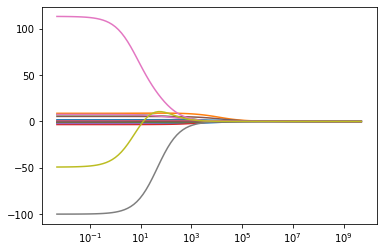

In [37]:
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale("log")

## Tahmin

In [38]:
ridge_model = Ridge().fit(X_train, y_train)

In [39]:
y_pred = ridge_model.predict(X_train)

In [40]:
y_pred[0:10]

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [41]:
y_train[0:10]

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

In [42]:
#train hatası
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
RMSE

289.34470696006565

In [43]:
np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))

351.3931585606317

In [44]:
#test hatası
y_pred = ridge_model.predict(X_test)

In [45]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

356.8082905730238

## Model Tuning

**Neden Model Tuning?**

In [46]:
ridge_model = Ridge(1).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.8082905730238

In [47]:
np.random.randint(0,1000,100)

array([ 76,  99, 264, 808, 295, 429, 768, 351, 606, 170, 703, 489, 101,
       602, 517,  62, 122,  32, 189, 324, 540, 936, 433, 680, 948, 586,
       554, 575, 607, 813, 717, 139, 963, 745, 654, 634,  82,   4, 615,
       820, 779,  60, 232, 356, 427,  97, 405, 840, 939,  29, 570, 881,
       918, 875, 271, 397, 960, 950, 206, 491, 924, 724, 366, 203, 929,
       870, 107,  69,   9,  51, 131, 600, 460, 710, 682, 666, 122, 573,
       871, 951, 275, 587, 390, 843, 753, 718, 325, 980, 130, 891, 214,
       750, 479, 179, 474, 304, 587, 988, 325, 885])

In [48]:
lambdalar1 = np.random.randint(0,1000,100)

In [49]:
lambdalar2 = 10**np.linspace(10,-2,100)*0.5

In [50]:
ridgecv = RidgeCV(alphas = lambdalar1, scoring = "neg_mean_squared_error", cv = 10, normalize = True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([644, 971,  88, 299, 290, 720, 123, 831, 250, 967, 299, 413, 931,
       759, 292, 605, 104, 817, 394, 273, 914, 224, 874,  42,  98, 300,
       541, 399, 978, 900, 476, 843, 788, 680, 557, 275, 860, 739, 466,
        52, 430, 382, 234, 684,  41, 861, 963, 418, 480, 595, 873, 755,
       518, 197, 972, 486, 610, 101,  36,  73, 867, 208, 147, 675, 202,
       160, 234, 574, 260, 138, 435, 264, 687, 241,  21,  34, 168, 927,
       855, 734, 894, 420, 938, 147, 232, 577, 175, 132, 818, 302, 670,
       235, 535, 857, 636, 658, 473,  46, 696, 263]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [51]:
ridgecv.alpha_

21

In [ ]:
#final modeli 

In [52]:
ridge_tuned = Ridge(alpha = ridgecv.alpha_).fit(X_train, y_train)

In [53]:
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.46963754795104

# Lasso Regresyon

In [54]:
#lasso regression l1 (mutlak)
#Tüm değişkenler kalmaz, bazılarını 0 yapıyor



#ridge resression l2

### Gerekli Kütüphaneler

In [56]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV

### Veri Seti

In [57]:
df = pd.read_csv("Hitters.csv")

df = df.dropna()

dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df["Salary"]

X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [58]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [59]:
df.shape

(263, 20)

In [60]:
lasso_model = Lasso().fit(X_train, y_train)

D:\Programs\Anaconda\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8256653.399850385, tolerance: 3898.686956380658
  positive)


In [61]:
lasso_model

Lasso()

In [62]:
lasso_model.intercept_

-5.587450677336733

In [63]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [ ]:
#farklı lambda degerlerine karsilik katsayilar

In [64]:
lasso = Lasso()
coefs = []
alphas = 10**np.linspace(10,-2,100)*0.5
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

D:\Programs\Anaconda\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5469.558741401881, tolerance: 3898.686956380658
  positive)
D:\Programs\Anaconda\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6540.147679608315, tolerance: 3898.686956380658
  positive)
D:\Programs\Anaconda\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4001.756137549877, tolerance: 3898.686956380658
  positive)
D:\Programs\Anaconda\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You mi

Text(0.5, 0, 'agirlik')

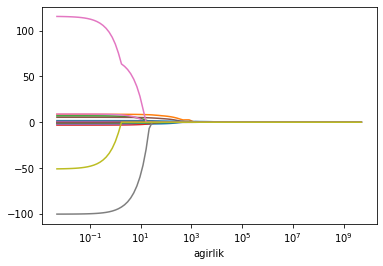

In [67]:
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")
plt.xlabel('agirlik')

## Tahmin

In [68]:
lasso_model

Lasso()

In [69]:
lasso_model.predict(X_train)[0:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [70]:
lasso_model.predict(X_test)[0:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [71]:
y_pred = lasso_model.predict(X_test)

In [72]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.0975884554033

In [73]:
r2_score(y_test, y_pred)

0.4142279813236619

## Model Tuning

In [74]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [75]:
lasso_cv_model = LassoCV(alphas = alphas, cv = 10, max_iter = 100000).fit(X_train, y_train)

In [76]:
lasso_cv_model.alpha_

201.85086292982749

In [ ]:
lasso_tuned = Lasso().set_params(alpha = lasso_cv_model.alpha_).fit(X_train, y_train)

In [78]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_).fit(X_train, y_train)

In [79]:
y_pred = lasso_tuned.predict(X_test)

In [80]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.6832708037446

In [81]:
pd.Series(lasso_tuned.coef_, index = X_train.columns)

AtBat         -1.052276
Hits           5.342648
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          2.640006
Years          0.000000
CAtBat        -0.174125
CHits          0.249805
CHmRun        -0.000000
CRuns          1.035075
CRBI           0.469281
CWalks        -0.186771
PutOuts        0.272541
Assists        0.170528
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64

# ElasticNet Regresyon Modeli

### Gerekli Kütüphaneler

In [83]:
#ridge+lasso

In [84]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV

### Veri Seti

In [85]:
df = pd.read_csv("Hitters.csv")

df = df.dropna()

dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df["Salary"]

X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [86]:
enet_model = ElasticNet().fit(X_train, y_train)

D:\Programs\Anaconda\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8487984.799367279, tolerance: 3898.686956380658
  positive)


In [87]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [88]:
enet_model.intercept_

-6.465955602113127

In [89]:
#tahmin
enet_model.predict(X_train)[0:10]

array([325.74706292, 776.06632333, 522.86508419, 107.64091955,
       449.03139566, 997.76095723,  99.78828622, 311.33763086,
       418.50335021, 879.9502608 ])

In [90]:
enet_model.predict(X_test)[0:10]

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123])

In [91]:
y_pred = enet_model.predict(X_test)

In [92]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.1676548181244

In [93]:
r2_score(y_test, y_pred)

0.41070222469326945

## Model Tuning

In [94]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [95]:
enet_cv_model = ElasticNetCV(alphas = alphas, cv = 10).fit(X_train, y_train)

D:\Programs\Anaconda\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3249.948308315128, tolerance: 3241.4244490642727
  tol, rng, random, positive)
D:\Programs\Anaconda\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4337.0031534601, tolerance: 3241.4244490642727
  tol, rng, random, positive)
D:\Programs\Anaconda\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5751.424800049514, tolerance: 3241.4244490642727
  tol, rng, random, positive)
D:\Programs\Anaconda\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527:

D:\Programs\Anaconda\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7182664.582067743, tolerance: 3617.313788867113
  tol, rng, random, positive)
D:\Programs\Anaconda\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7315966.5424380135, tolerance: 3617.313788867113
  tol, rng, random, positive)
D:\Programs\Anaconda\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7386668.734566504, tolerance: 3617.313788867113
  tol, rng, random, positive)
D:\Programs\Anaconda\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527:

D:\Programs\Anaconda\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7393671.592226074, tolerance: 3528.2752057703365
  tol, rng, random, positive)
D:\Programs\Anaconda\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7397333.992402472, tolerance: 3528.2752057703365
  tol, rng, random, positive)
D:\Programs\Anaconda\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7400049.191258361, tolerance: 3528.2752057703365
  tol, rng, random, positive)
D:\Programs\Anaconda\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:52

D:\Programs\Anaconda\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7139015.1660880335, tolerance: 3582.448344789122
  tol, rng, random, positive)
D:\Programs\Anaconda\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7140147.346158757, tolerance: 3582.448344789122
  tol, rng, random, positive)
D:\Programs\Anaconda\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7140919.228954336, tolerance: 3582.448344789122
  tol, rng, random, positive)
D:\Programs\Anaconda\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527:

D:\Programs\Anaconda\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7395832.277284469, tolerance: 3701.0815904731803
  tol, rng, random, positive)
D:\Programs\Anaconda\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7416780.639676657, tolerance: 3701.0815904731803
  tol, rng, random, positive)
D:\Programs\Anaconda\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7430735.873435556, tolerance: 3701.0815904731803
  tol, rng, random, positive)
D:\Programs\Anaconda\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:52

D:\Programs\Anaconda\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7258207.007624852, tolerance: 3682.649486336423
  tol, rng, random, positive)
D:\Programs\Anaconda\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7281265.42509556, tolerance: 3682.649486336423
  tol, rng, random, positive)
D:\Programs\Anaconda\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7294955.722881059, tolerance: 3682.649486336423
  tol, rng, random, positive)
D:\Programs\Anaconda\envs\deeplearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: C

In [96]:
enet_cv_model.alpha_

5748.784976988678

In [97]:
enet_cv_model.intercept_

-31.46312122564109

In [98]:
enet_cv_model.coef_

array([ 0.61111381,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.11212622,  0.        ,
        0.25252702,  0.18656722,  0.00444355,  0.30988823,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ])

In [ ]:
#final modeli

In [99]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train, y_train)

In [100]:
y_pred = enet_tuned.predict(X_test)

In [101]:
np.sqrt(mean_squared_error(y_test, y_pred))

393.9753065850553

In [104]:
?ElasticNet